In [2]:
!pip install tensorflow==2

  Using cached tensorflow-2.0.0-cp37-cp37m-win_amd64.whl (48.1 MB)
  Using cached tensorboard-2.0.2-py3-none-any.whl (3.8 MB)
  Using cached tensorflow_estimator-2.0.1-py2.py3-none-any.whl (449 kB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
#載入數據
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

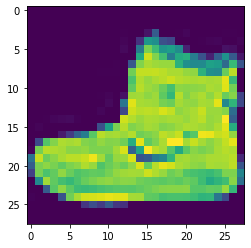

[9 0 0]


In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.show()
print(train_labels[0:3])

In [13]:
train_images=train_images/255.0
test_images=test_images/255.0

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
#建立模型
model=keras.Sequential([
    #將圖像從28*28轉換成一維，
    #可以將這一層看作是堆疊圖像中的像素行並對齊它們。
    #該層沒有學習參數。它只會重新格式化數據。
    keras.layers.Flatten(input_shape=(28,28)),
    #128個節點（或神經元）
    keras.layers.Dense(128,activation='relu'),
    #第二層（也是最後一層）返回長度為10的logits數組。
    keras.layers.Dense(10)
])

In [26]:
#編譯模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4982 - accuracy: 0.8245
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3758 - accuracy: 0.8642
Epoch 3/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3386 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3134 - accuracy: 0.8848
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2943 - accuracy: 0.8928
Epoch 6/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2811 - accuracy: 0.8973
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2659 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2558 - accuracy: 0.9050
Epoch 9/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2476 - accuracy: 0.9082
Epoch 10/10
60

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2329 - accuracy: 0.8843

Test accuracy: 0.8843


In [29]:
#附加一個softmax曾將logit轉成概率
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [30]:
predictions = probability_model.predict(test_images)

In [37]:
predictions[0]
#預測百分之多少是這個image
print(100*np.max(predictions[0]))

98.80082607269287


In [34]:
pred=model.predict(test_images)
pred[0]

array([-12.436131  , -13.713337  , -13.065301  , -14.534484  ,
       -16.33052   ,  -0.4529127 ,  -9.035326  ,   0.16567461,
       -11.6753435 ,   5.008167  ], dtype=float32)

In [35]:
class_index=np.argmax(predictions[0])

In [36]:
class_names[class_index]

'Ankle boot'

In [44]:
#指定第幾張圖片，預測結果，真實標籤集，圖片集
def plot_image(i,predictions_array,true_labeles,imges):
    plt.imshow(imges[i],cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions_array)
    if predicted_label==true_labeles[i]:
        color='blue'
    else:
        color='red'
    plt.xlabel("{} {:2.0f}% {}".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                      class_names[true_labeles[i]],
                                      color=color))

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

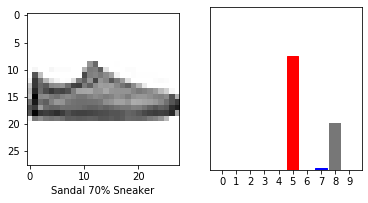

In [46]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

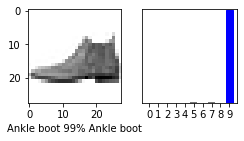

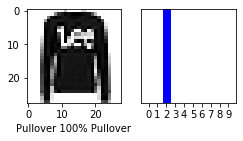

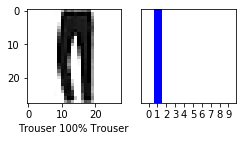

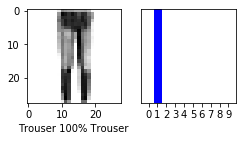

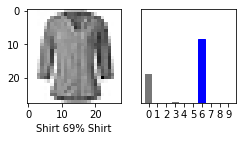

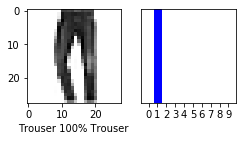

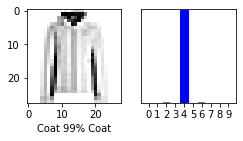

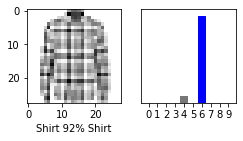

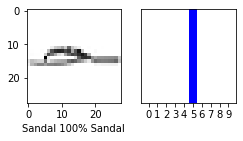

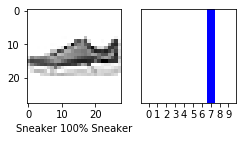

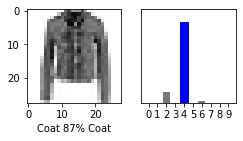

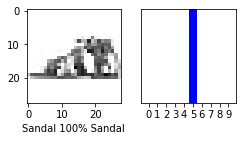

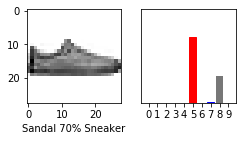

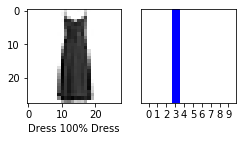

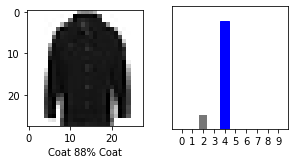

In [48]:
for i in range(15):
    plt.figure(figsize=(12,10))
    #row代表行數，col代表列，地3個參數代表第幾個圖
    plt.subplot(5,6,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(5,6,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()